# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Python Course/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [6]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [8]:
data.shape

(3454, 15)

* There are 15 columns with 3,454 rows in the data set.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 numeric (*float* and *integer* type) and 4 string (*object* type) columns in the data
* The target variable is the price of a used phone/tablet which is of *float* type

In [9]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


* We can see that the normalized used price varies between 1.53 and 6.61 euros.
* The mean normalized used price is 4.36 euros.
* The refurbished items were released between 2013 and 2020.
* The days used of the refurbished items range from 91 to 1,094 days.

In [10]:
data.duplicated().sum()

0

* There are no duplicate values

In [11]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are missing values in 6 columns (*main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight*).

## Exploratory Data Analysis (EDA)

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [13]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [14]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
    plt.show()

###*Normalized Used Price*

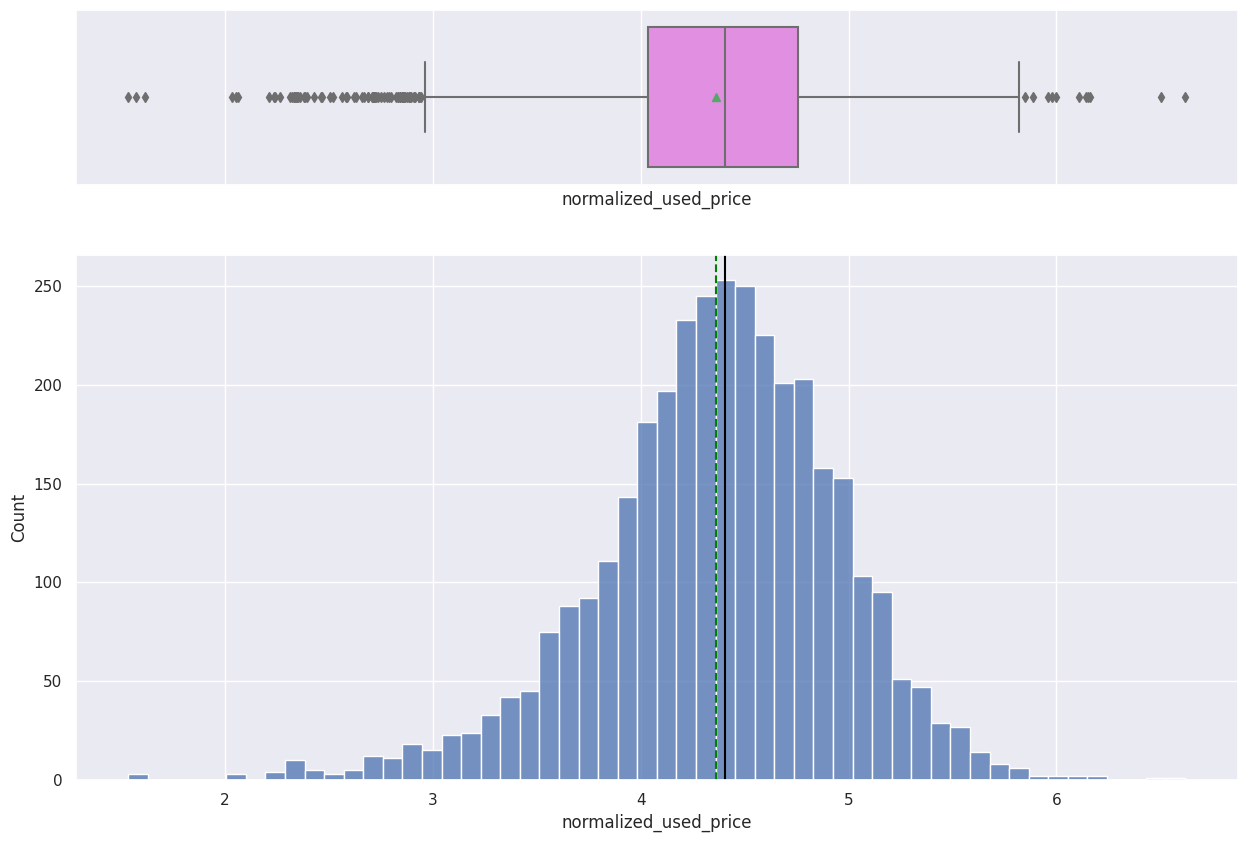

In [24]:
histogram_boxplot(data, "normalized_used_price")

* The normalized used price of refurbished devices is nearly normally distributed.

###*Normalized New Price*

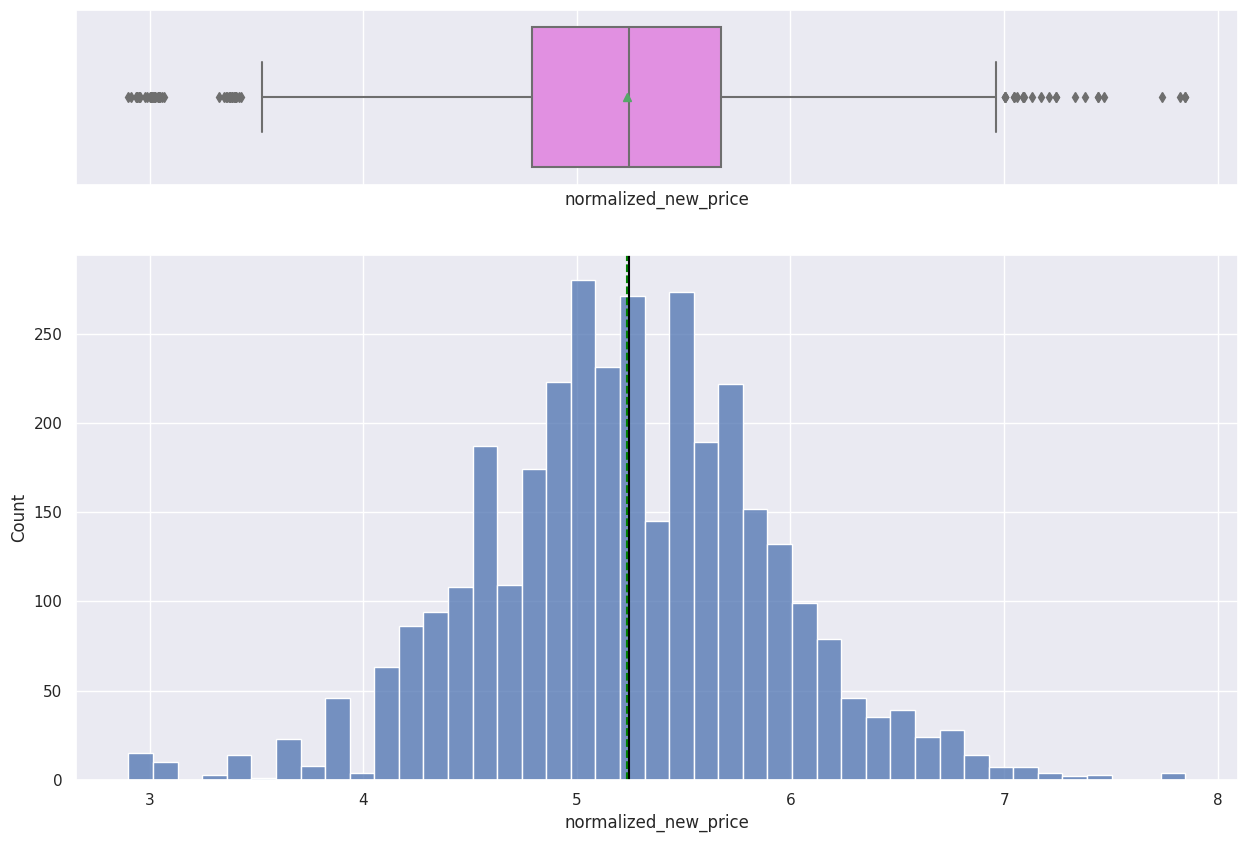

In [28]:
histogram_boxplot(data,'normalized_new_price')

* The normalized new price of devices is normally distrubuted.

###*Ram in GB*

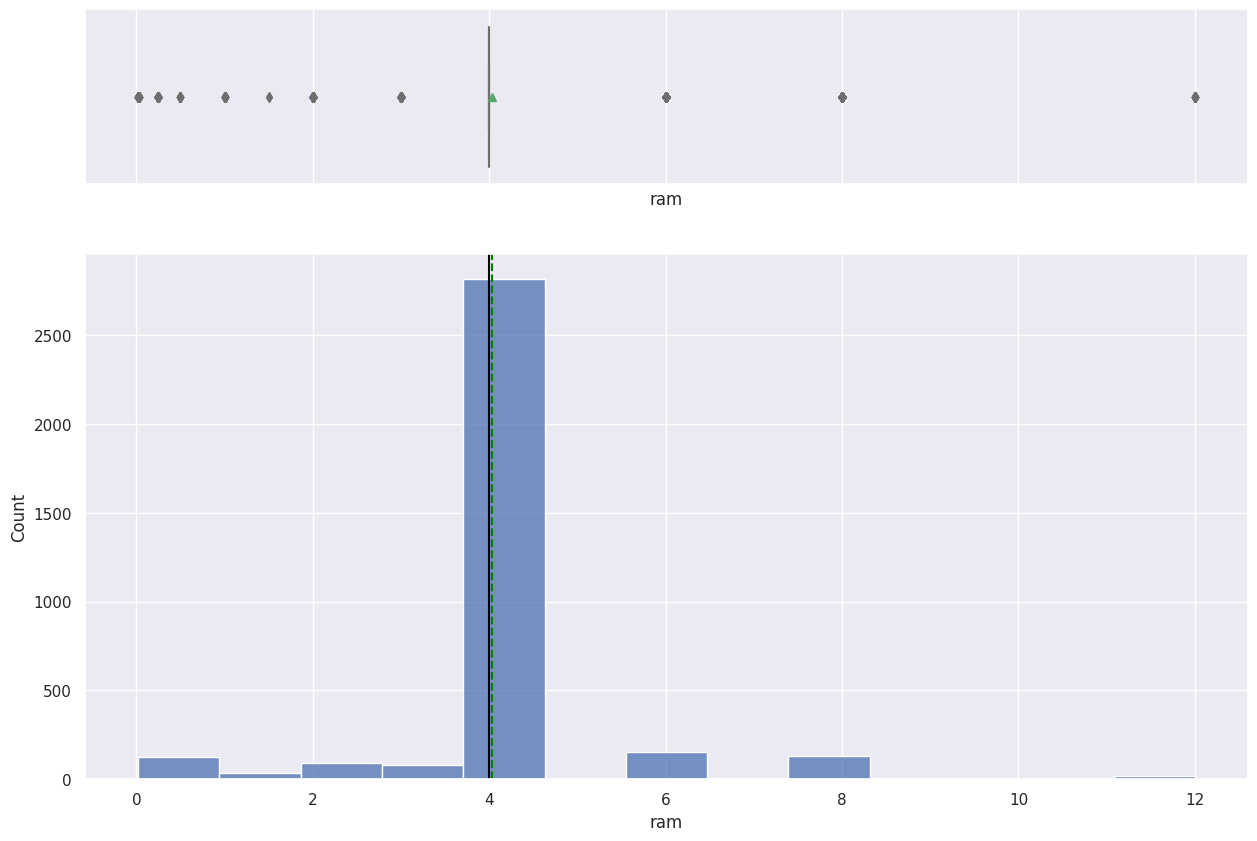

In [30]:
histogram_boxplot(data,'ram')

* The medium RAM size is 4 GB for devices.

###*Main Camera Megapixels*

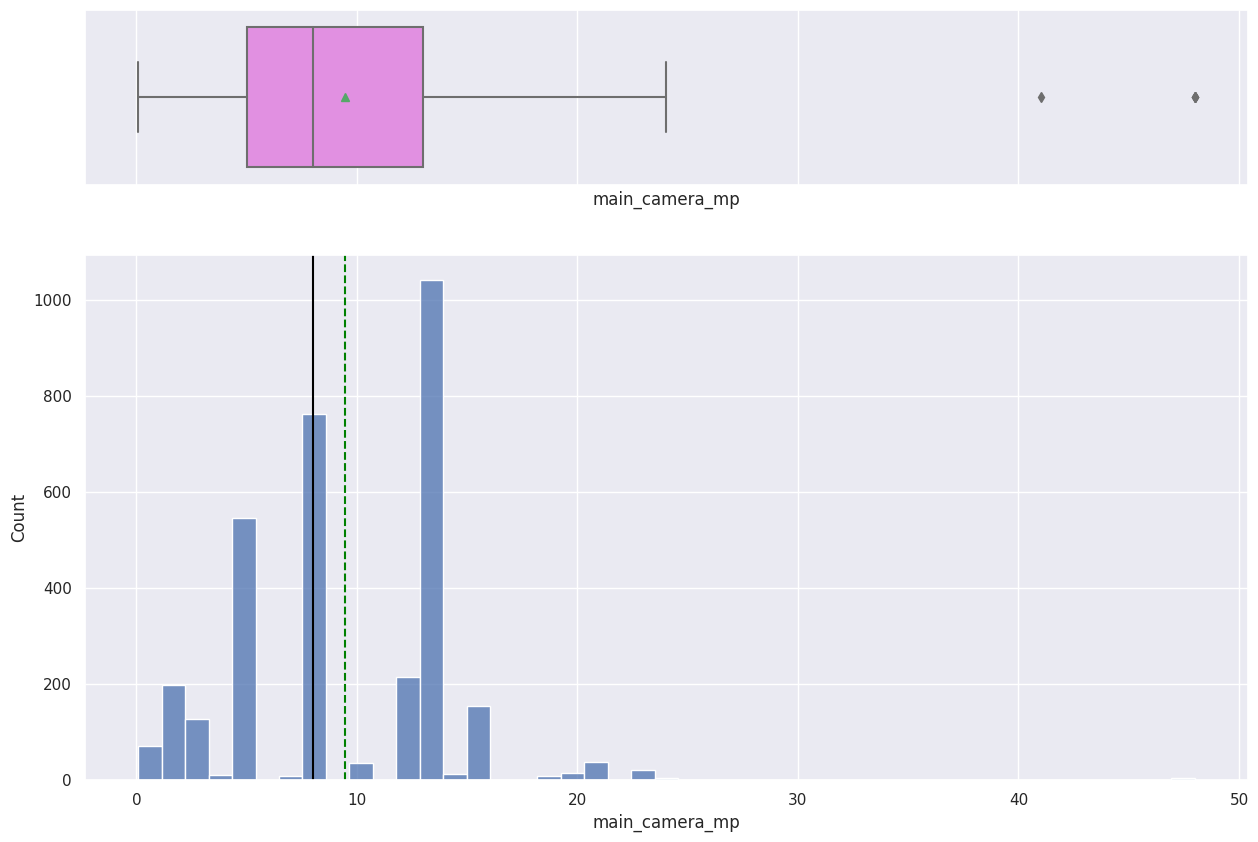

In [29]:
histogram_boxplot(data,'main_camera_mp')

The main camera megapixels median is less than the mean causing a slight right skewed distribution

###*Selfie Camera Megapixels*

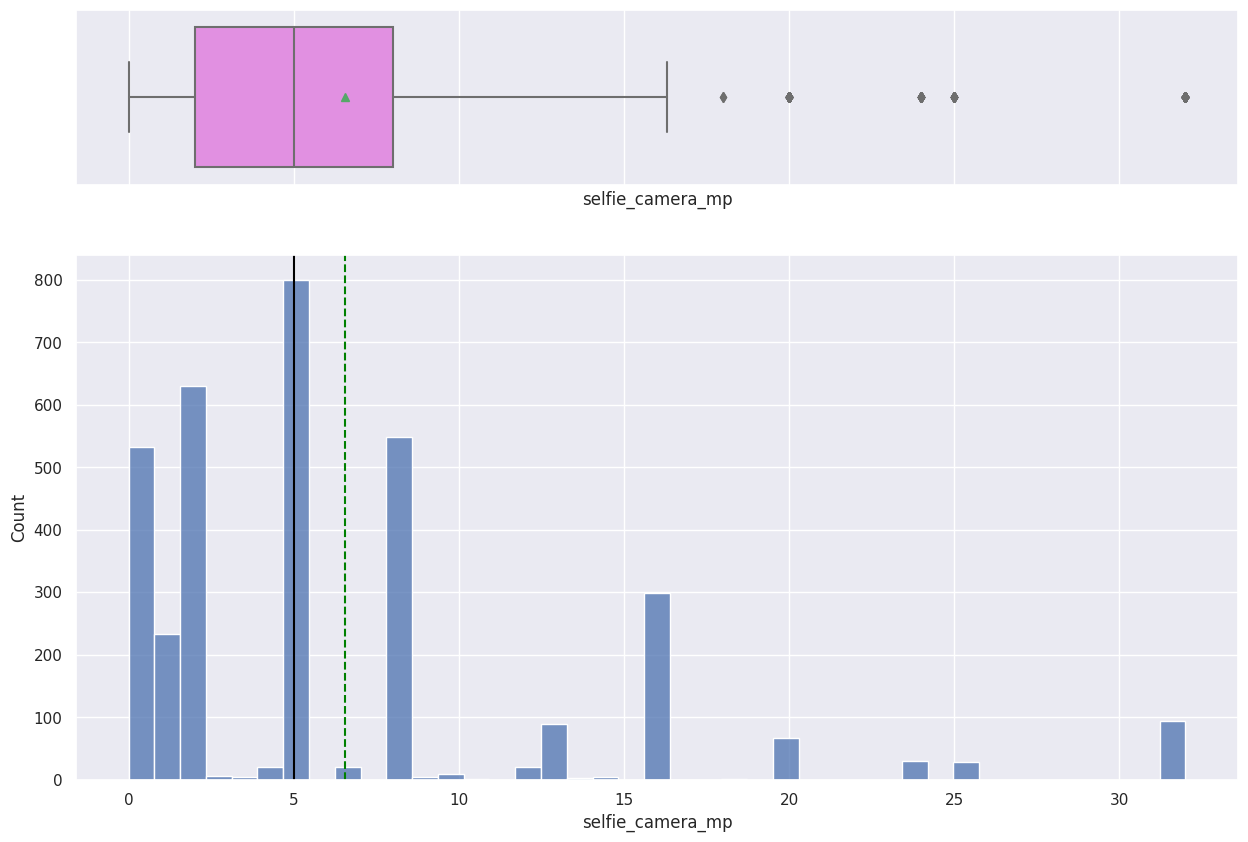

In [31]:
histogram_boxplot(data,'selfie_camera_mp')

* The selfie camera megapixels is highly right skewed with the max being over 30 mp.

###*Screen Size in cm*

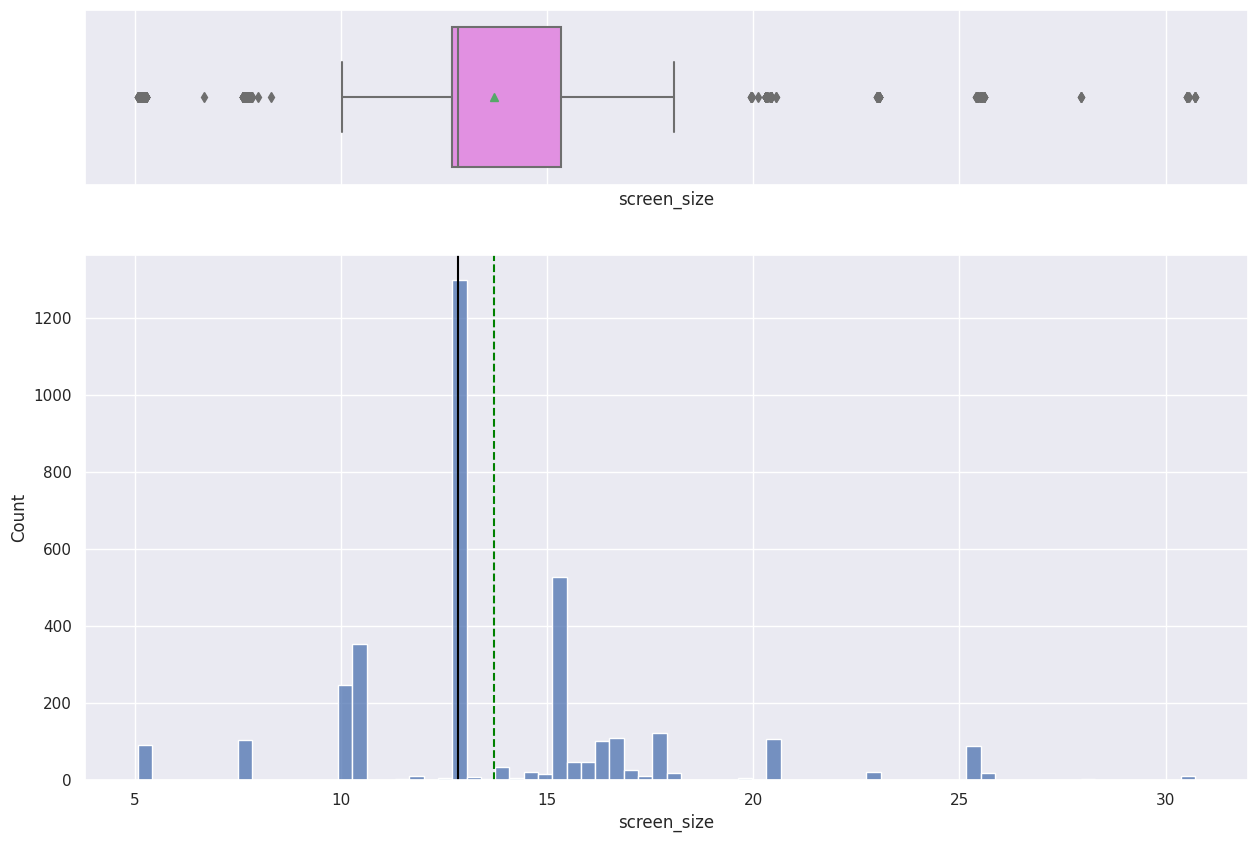

In [27]:
histogram_boxplot(data,'screen_size')

The distribution of screen size for devices is slightly right skewed.

###*Internal Memory*

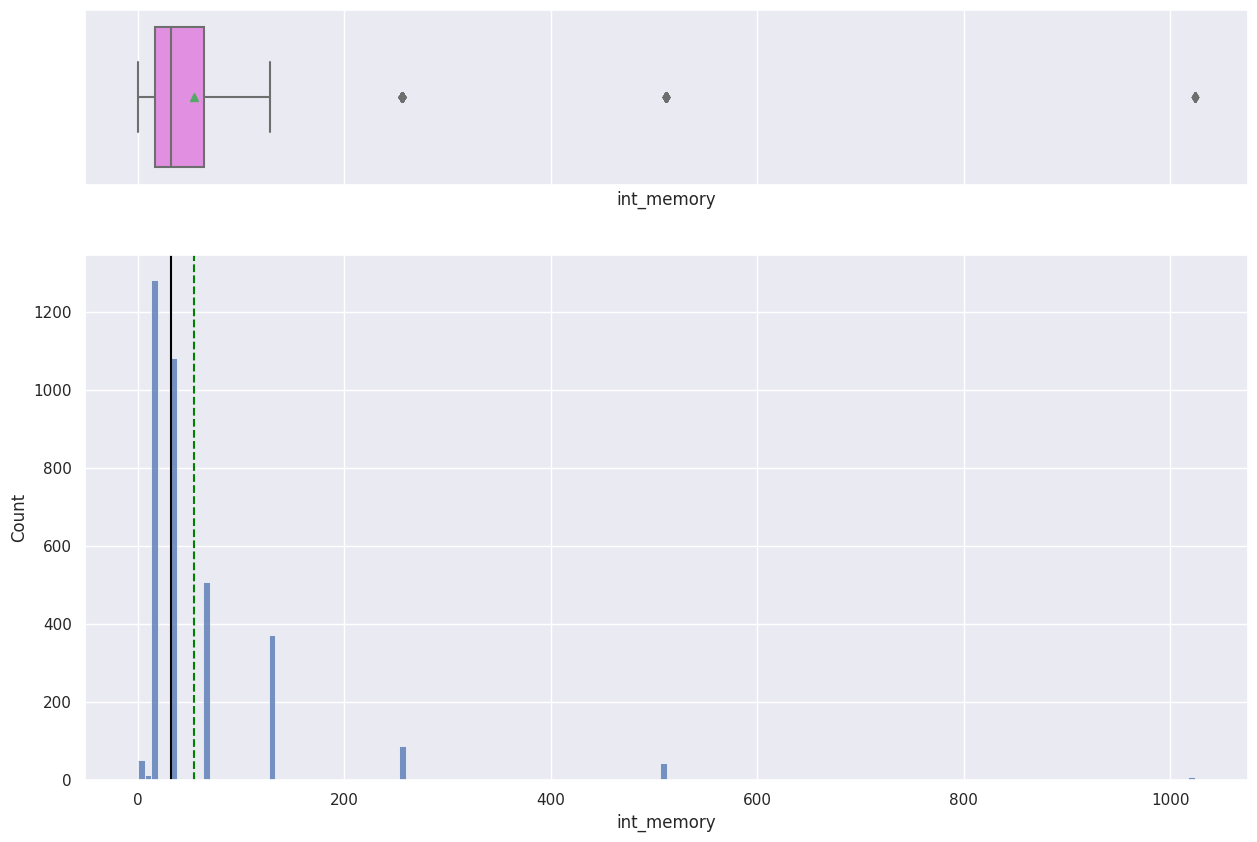

In [32]:
histogram_boxplot(data,'int_memory')

* The distribution of internal memory is right skewed with a majority of devices having less than 200 GB of internal memory.

###*Days Used*

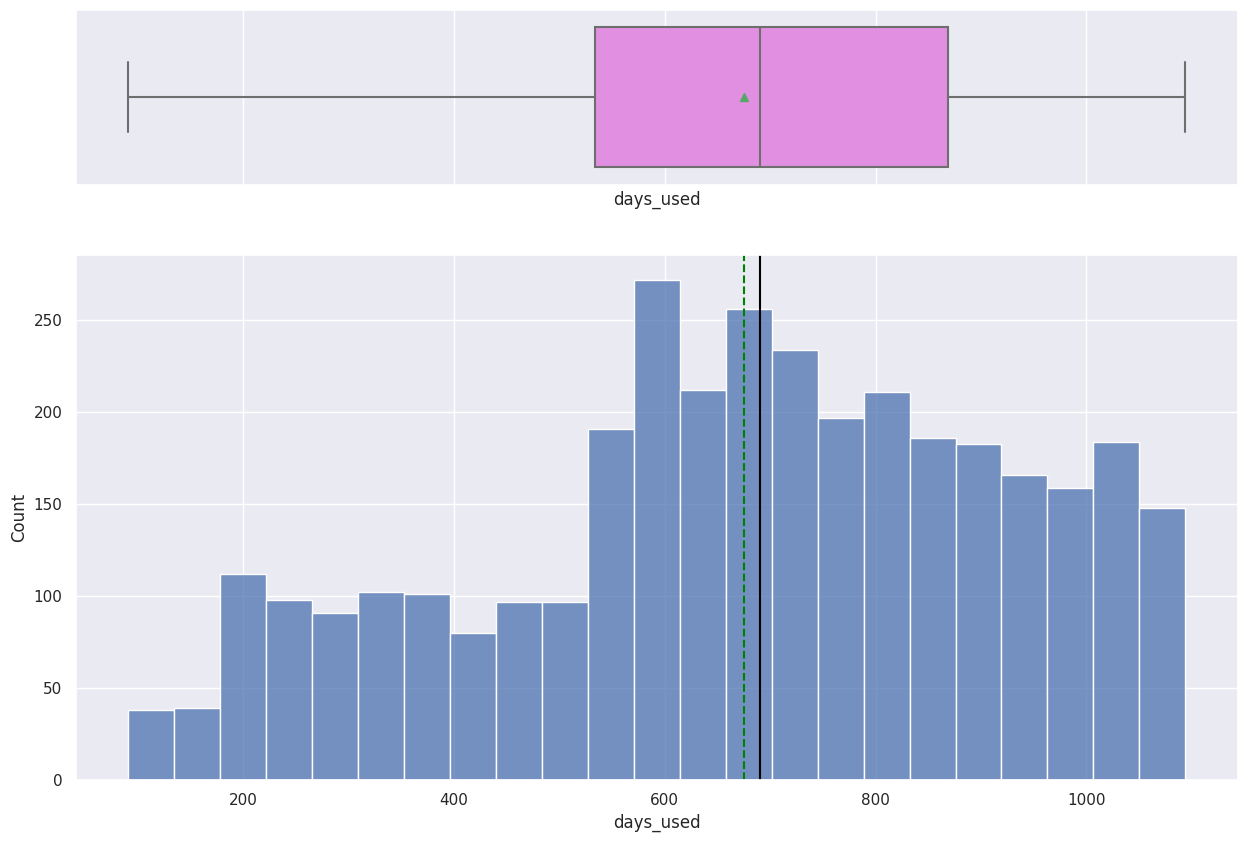

In [34]:
histogram_boxplot(data,'days_used')

The distribution of the number of days used of the devices is slightly left skewed with a majority having been used more than 600 days.

###*Weight*

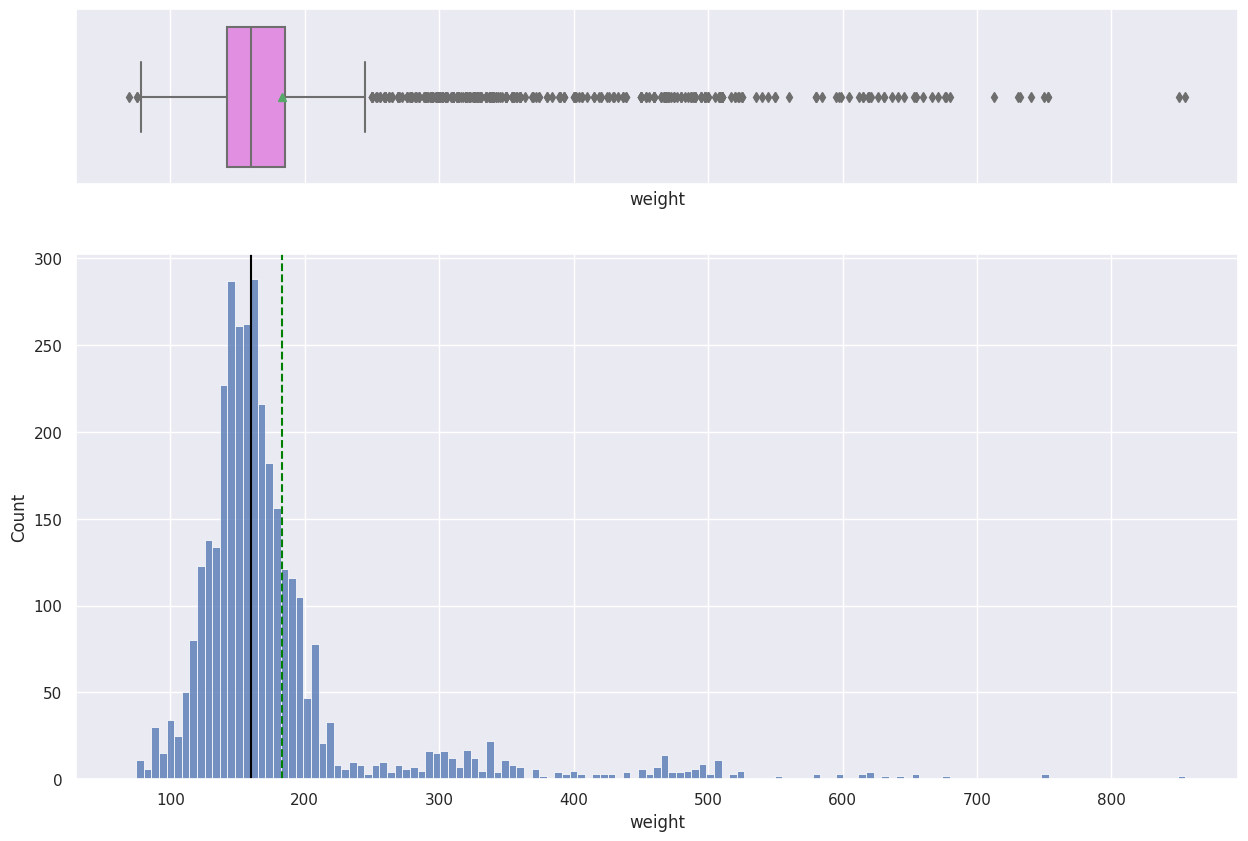

In [33]:
histogram_boxplot(data,'weight')

* The distribution for weight is heavily right skewed with a majority of devices weighing under 200 grams.

###*Battery*

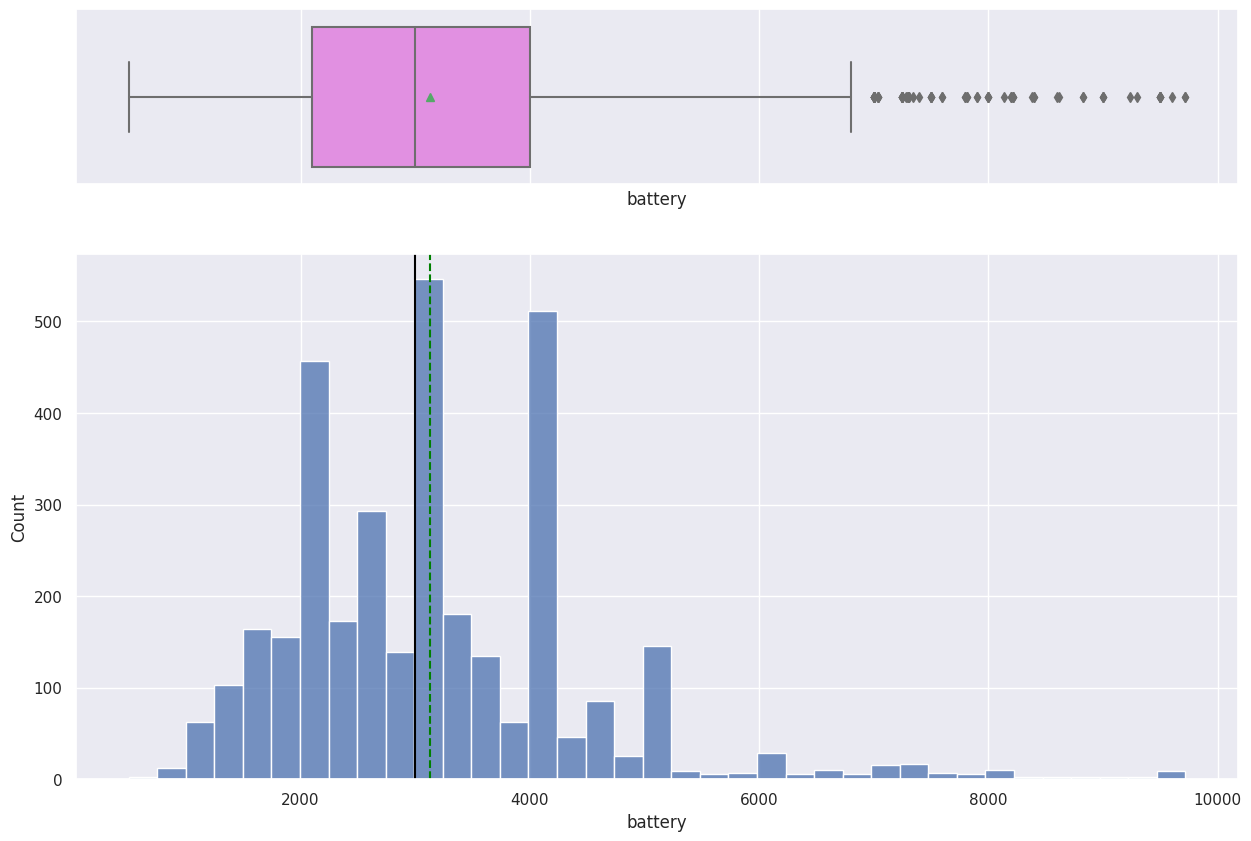

In [35]:
histogram_boxplot(data,'battery')

* A majority of devices have a battery energy capacity of 4500 mAh or below.

###*OS*

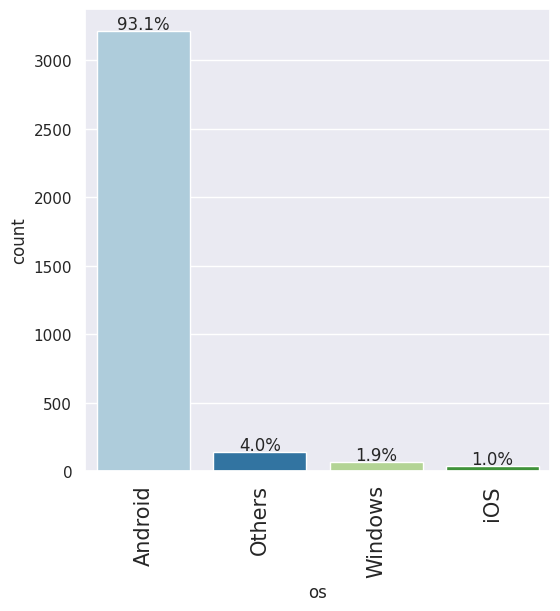

In [54]:
labeled_barplot(data, 'os', perc=True)

A majority of the devices have an Android operating system with 93% being Android.

###*4g*

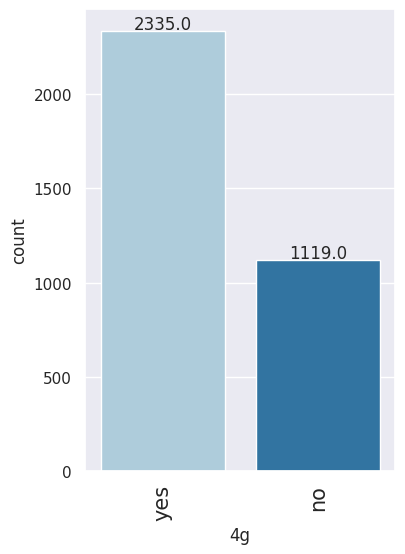

In [39]:
labeled_barplot(data,'4g')

* More than half of the devices are 4g.

###*5g*

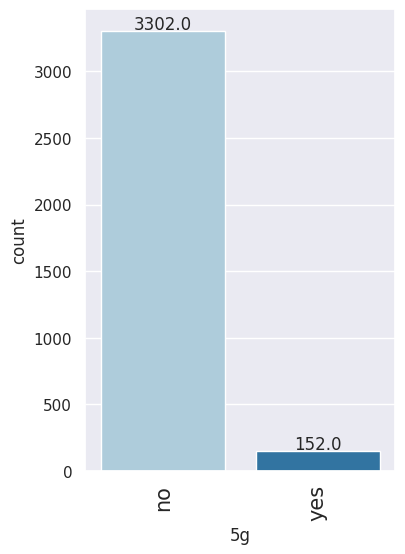

In [40]:
labeled_barplot(data,'5g')

* Very few devices are 5g.

###*Brand Name*

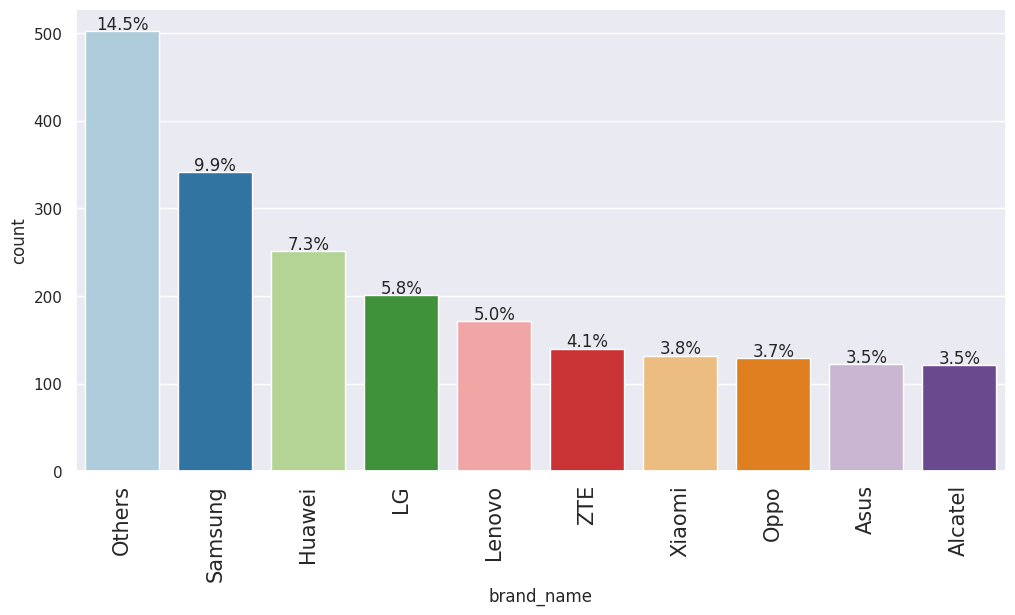

In [25]:
labeled_barplot(data, 'brand_name', perc=True, n=10)

* Samsung is the most popular brand of refurbished devices at ReCell.

###*Release Year*

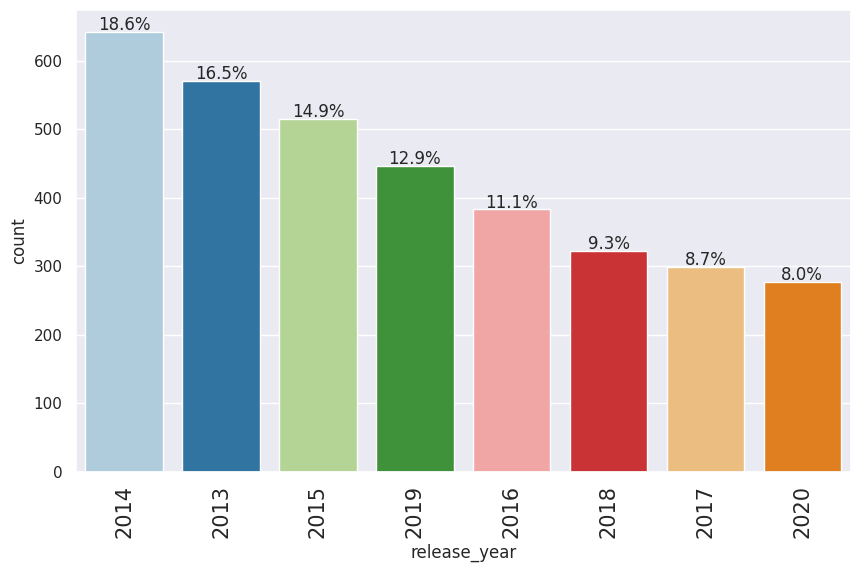

In [55]:
labeled_barplot(data, 'release_year', perc=True)

* 2014 release date is the most common for the refurbished devices followed by 2013, and 2015.

###Bivariate Analysis

**Correlation**

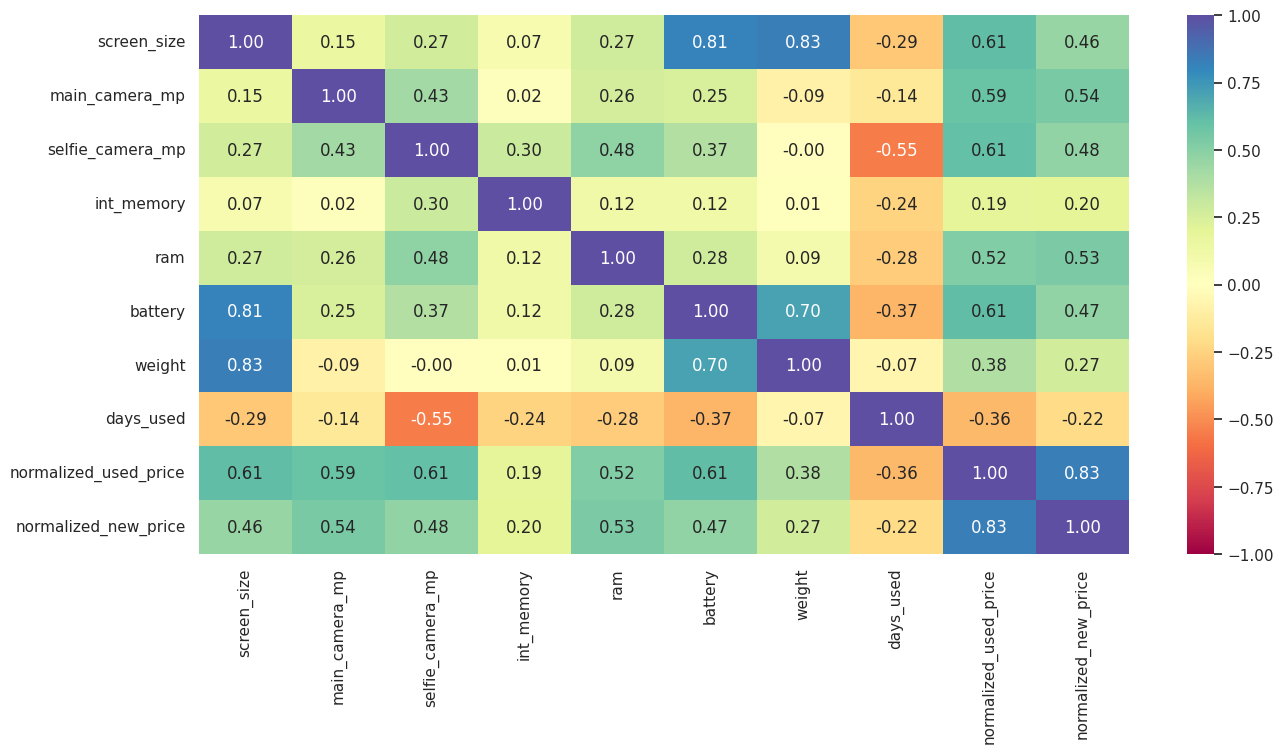

In [26]:
columns_list = data.select_dtypes(include=np.number).columns.tolist()

columns_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    data[columns_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The *screen size* and *battery* of the device have a strong positive correlation with the *weight* of the device.
* The *normalized used price* and the *normalized new price* have a strong positive correlation.
* *Screen size, main camera mp, selfie camera mp*, and *battery* have positive correlations with *normalized used price* of refurbished devices.

**RAM vs Brand**

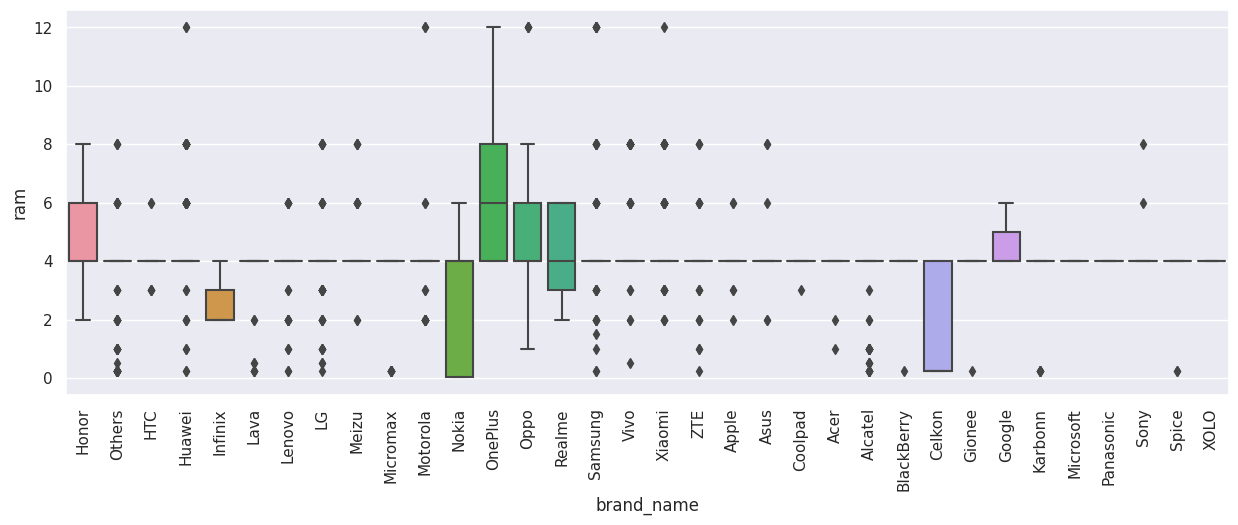

In [27]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=data, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

* OnePlus devices on average seem to have the largest RAM size

**Weight vs Battery size**

In [28]:
data_large_battery = data[data.battery > 4500]
data_large_battery.shape

(341, 15)

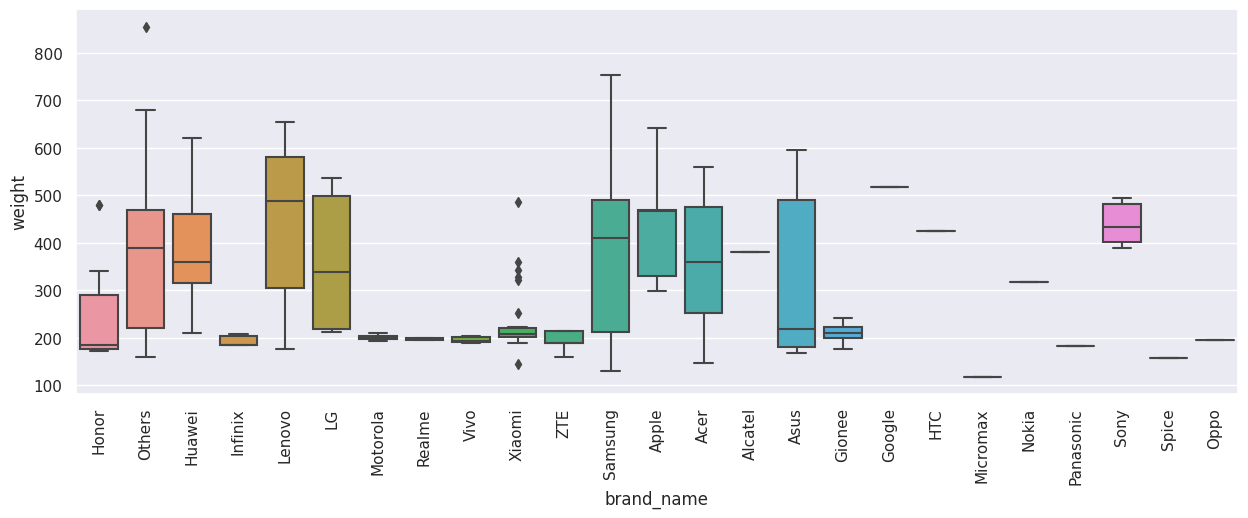

In [45]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=data_large_battery, y='weight', x='brand_name')
plt.xticks(rotation=90)
plt.show()

* Lenovo, Samsung, and Sony are the top devices that offer larger batteries.

**Selfie Camera vs Brand**

In [38]:
data_selfie_camera = data[data.selfie_camera_mp > 8]
data_selfie_camera.shape

(655, 15)

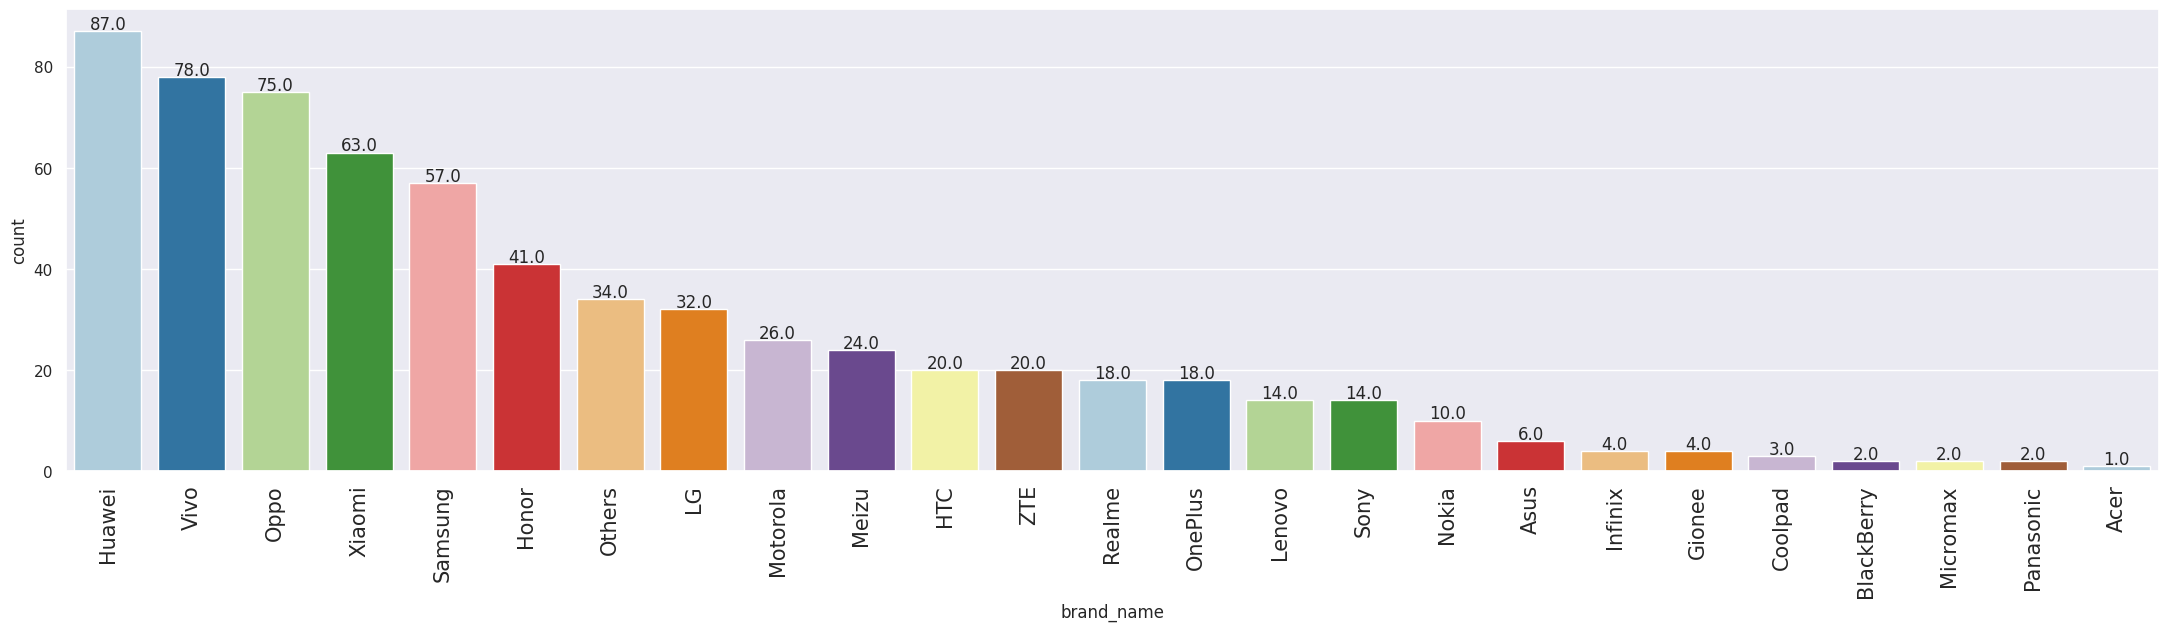

In [39]:
labeled_barplot(data_selfie_camera, 'brand_name')
plt.show()

* Customers who prefer a selfie camera with at least 8mp of resolutions should consider Huawei, Vivo, Oppo, Xiaomi or Samsung devices.

**Main Camera vs Brand**

In [46]:
data_main_camera = data[data.main_camera_mp > 16]
data_main_camera.shape

(94, 15)

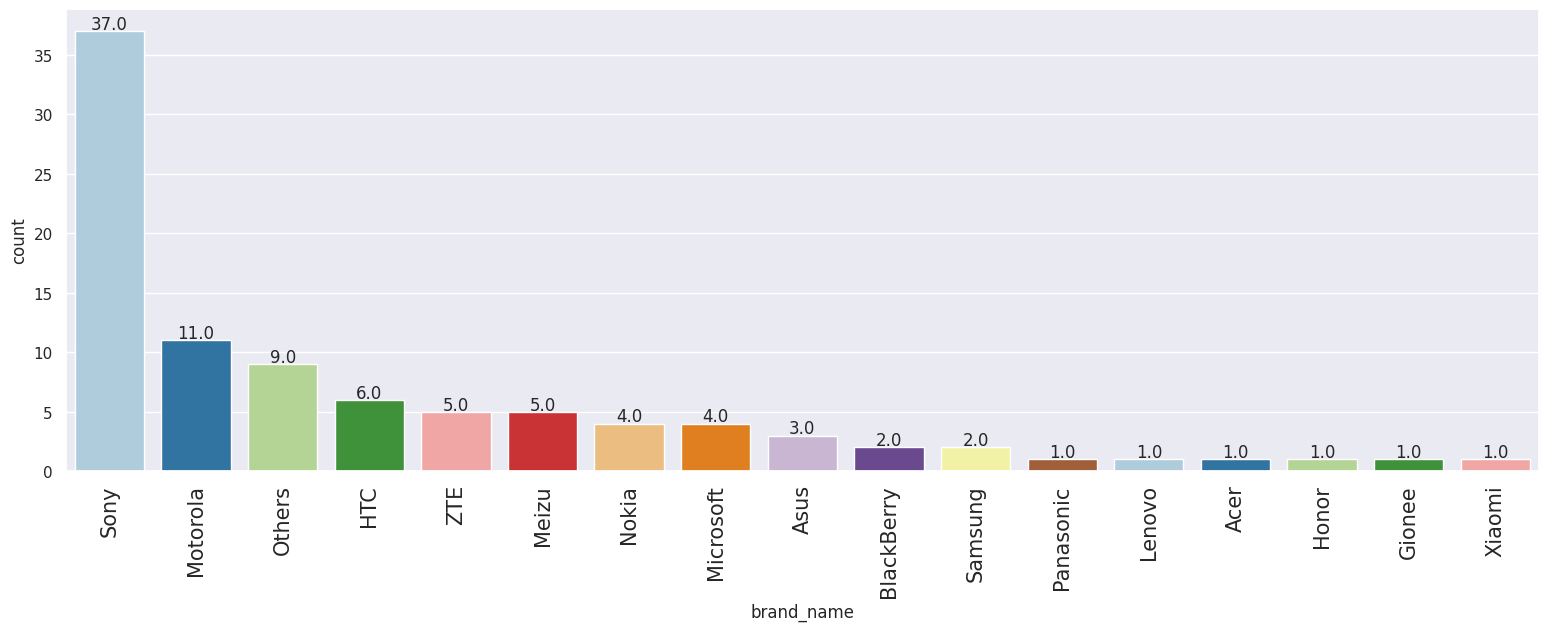

In [47]:
labeled_barplot(data_main_camera, 'brand_name')
plt.show()

* Customers who prefer a main camera with at least 16mp of resolutions should consider Sony or Motorola devices.

**Screen size vs Brand Name**

In [36]:
data_lg_screen = data[data.screen_size > 6 * 2.54]
data_lg_screen.shape

(1099, 15)

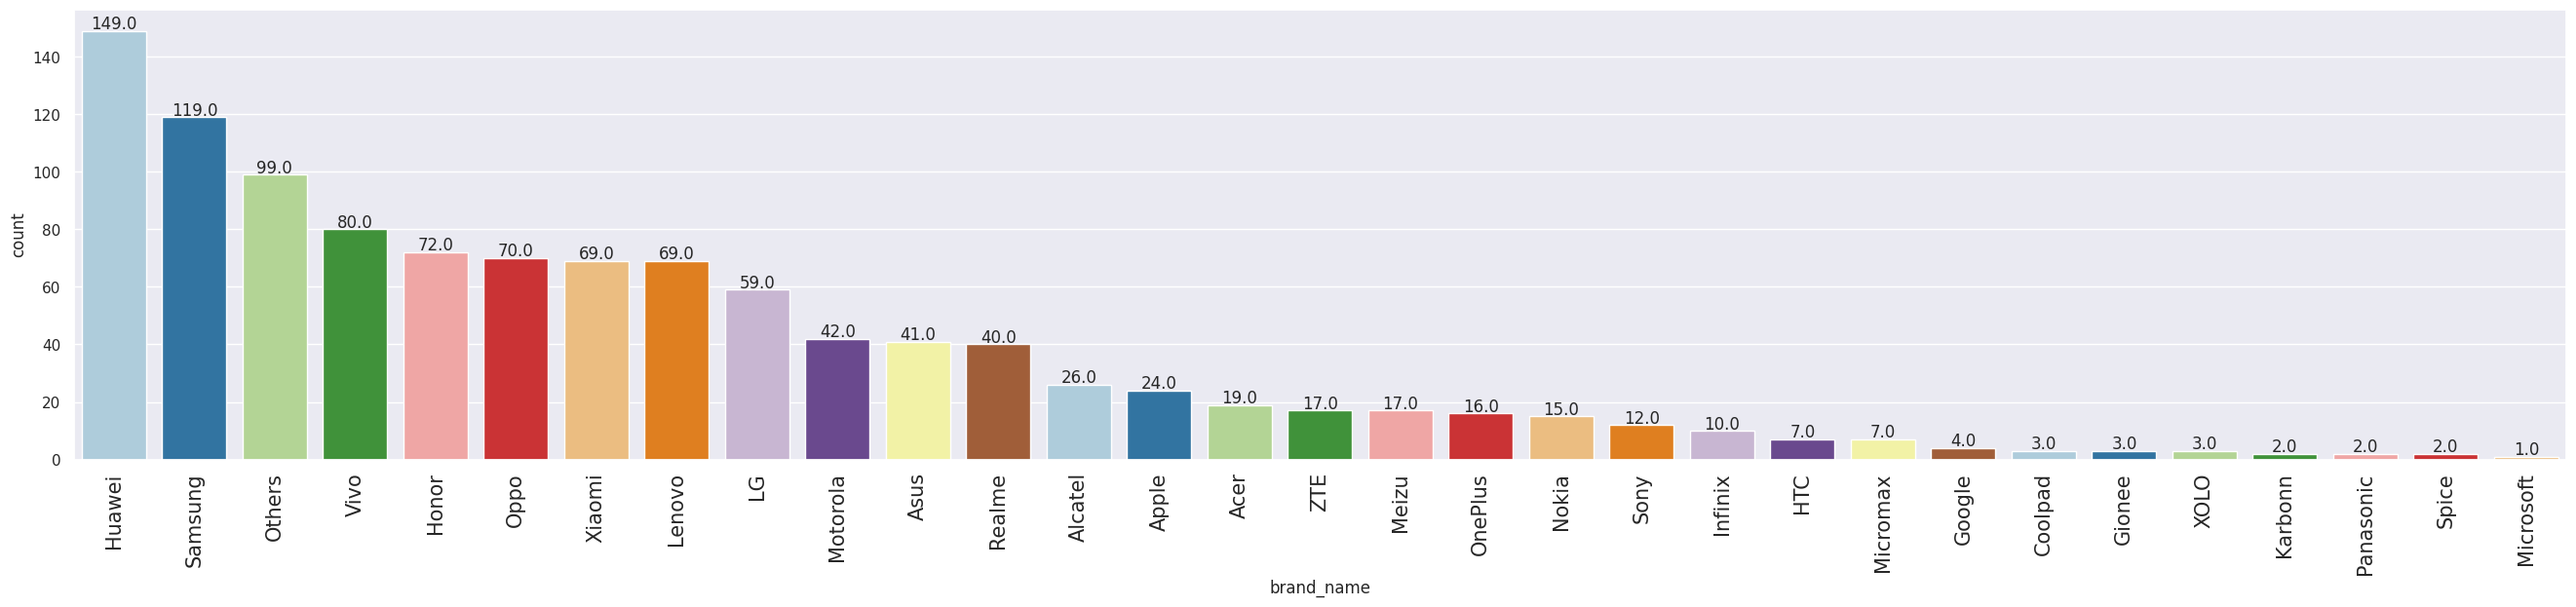

In [37]:
labeled_barplot(data_lg_screen,'brand_name')
plt.show()

* Customers who prefer to have a larger screen size will have more options from these brands: Huawei, Samsung, Vivo, Honor and Oppo.

**Used Device Prices vs Release year**

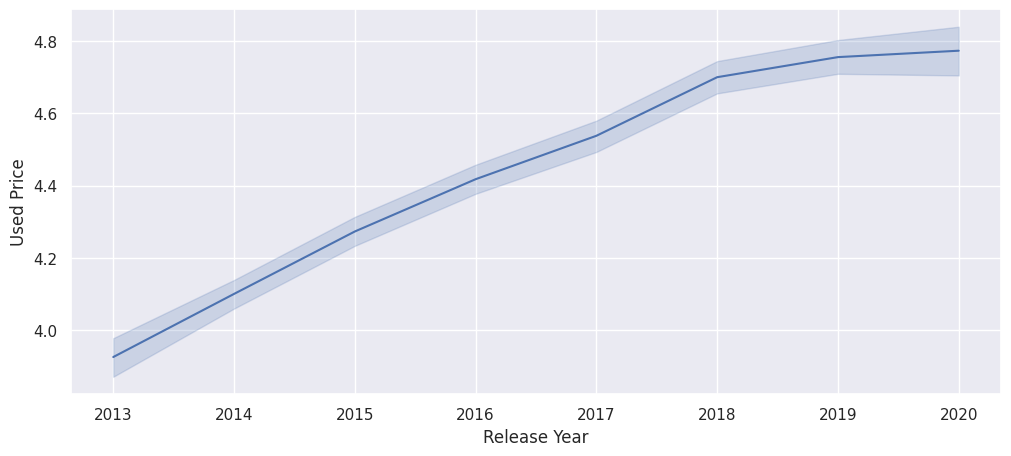

In [50]:
plt.figure(figsize=(12, 5))
sns.lineplot(data= data, y='normalized_used_price', x='release_year')
plt.xlabel('Release Year')
plt.ylabel('Used Price')
plt.show()

* Devices that were released longer ago have a lower normalized used price.
* The price of used refurbished devices increases as the phones are newer.

**Used Price 4g vs Used Price 5g**

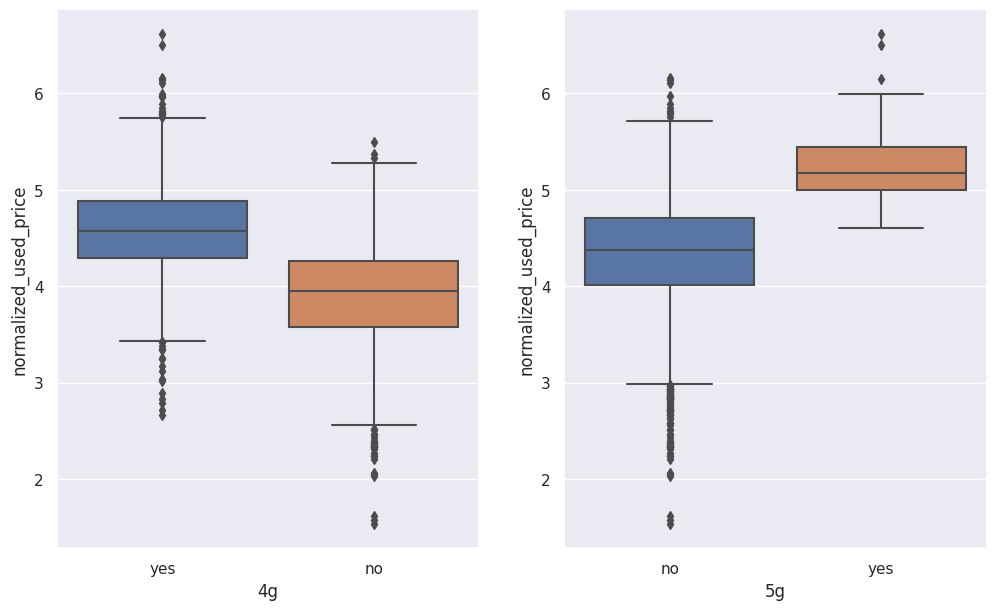

In [53]:
plt.figure(figsize=(12, 7))

plt.subplot(121)
sns.boxplot(data=data, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=data, x="5g", y="normalized_used_price")

plt.show()

* 5g devices have a higher used price compared to that of 4g devices.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [4]:
df = data.copy()

**Missing Value Treatment**

In [57]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

We will fix the missing values in the data by replacing the missing values with the median of that column.
* Main Camera MP, Selfie Camera MP, Internal memory, RAM, Battery, Weight

In [6]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df[col] = df[col].fillna(
        value=df.groupby(['release_year','brand_name',])[col].transform("median")
    )

df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [7]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df[col] = df[col].fillna(
        value=df.groupby(['brand_name',])[col].transform("median")
    )

df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [8]:
df['main_camera_mp'] = df["main_camera_mp"].fillna(df['main_camera_mp'].median)

In [9]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

* There are now no missing values.

**Feature Engineering**
* We will create a new column years_since_release from the release_year column and then drop the release_year column.

In [10]:
df["years_since_release"] = 2021 - df["release_year"]
df.drop("release_year", axis=1, inplace=True)
df["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

**Outliers**

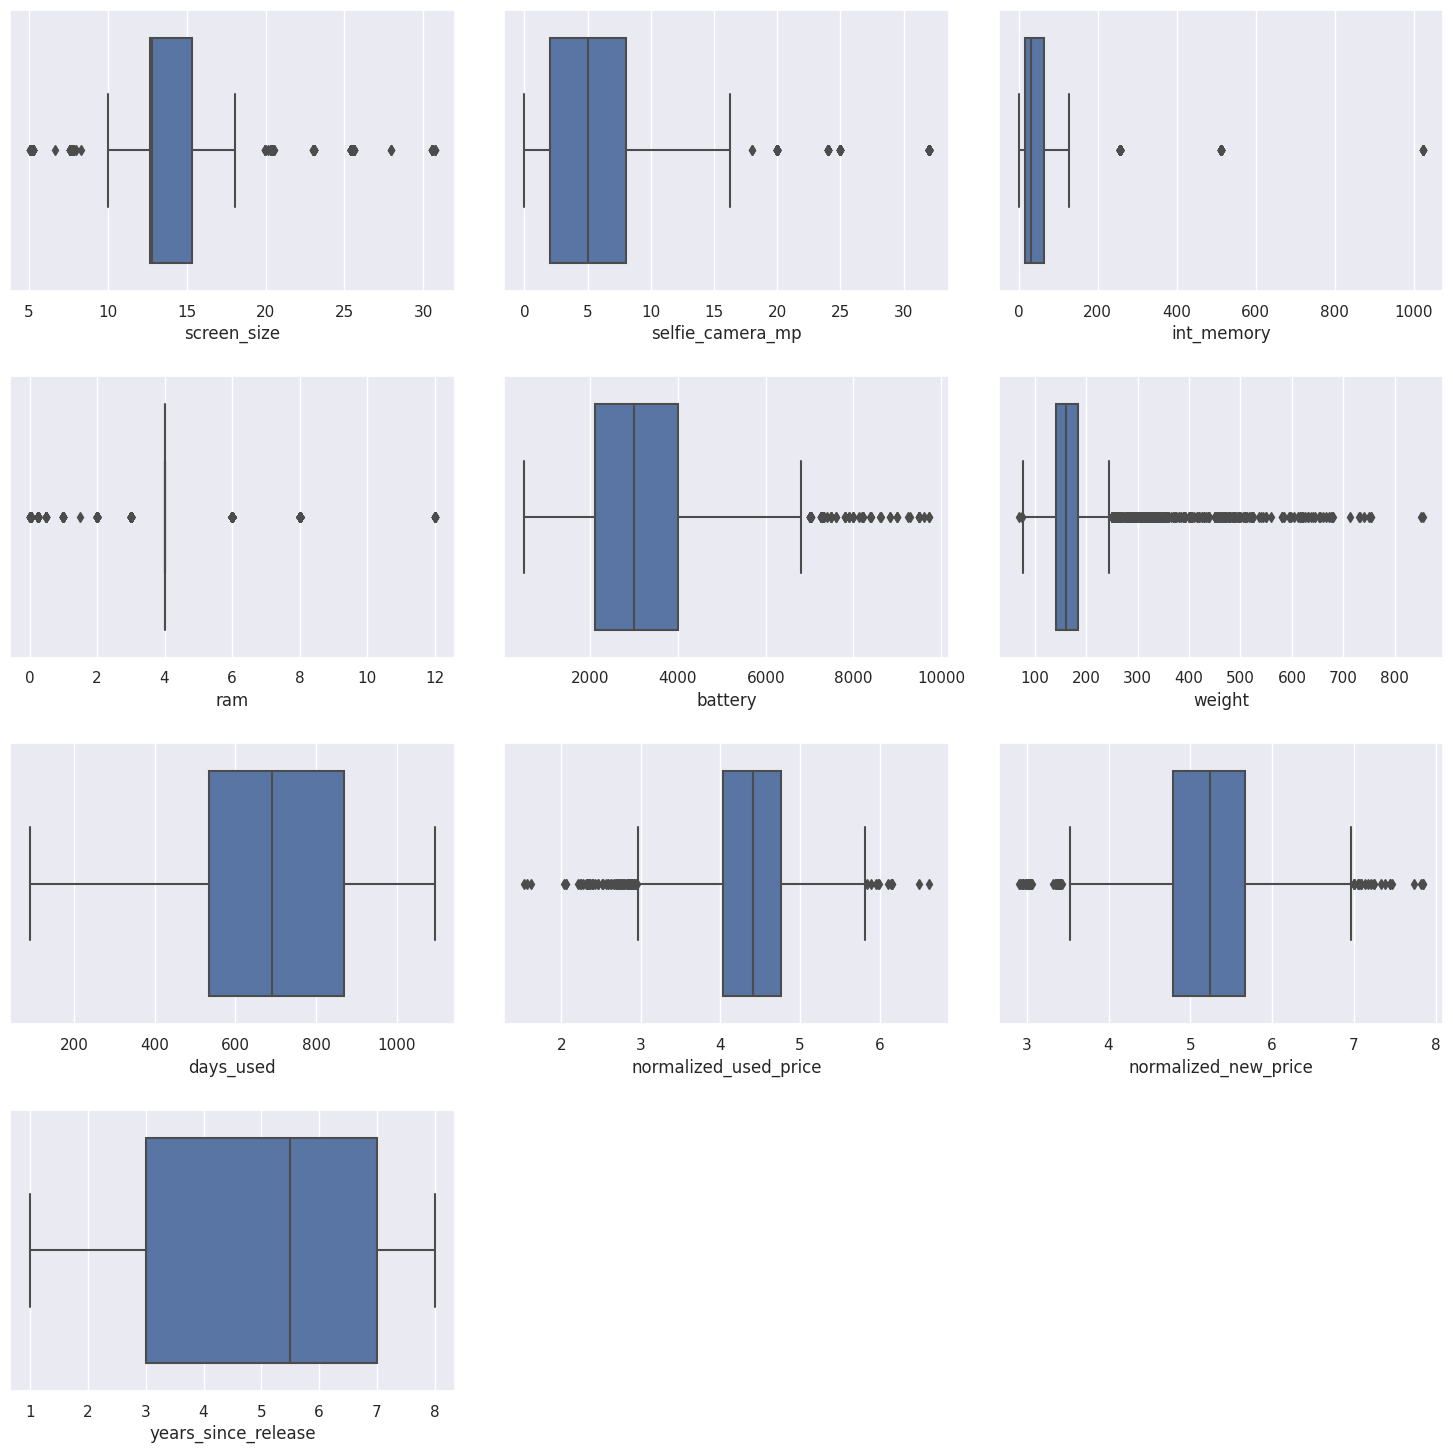

In [11]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* There are many outliers in the data, but we will leave them alone

**Preparing Data for Modeling**
* We will predict the normalized price of used devices
* We will split the data into train and test and then build a Linear Regression model using the train data to check its performance

In [13]:
X = df.drop(["normalized_used_price"], axis=1)
y = df["normalized_used_price"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g main_camera_mp  selfie_camera_mp  \
0      Honor  Android        14.50  yes   no           13.0               5.0   
1      Honor  Android        17.30  yes  yes           13.0              16.0   
2      Honor  Android        16.69  yes  yes           13.0               8.0   
3      Honor  Android        25.50  yes  yes           13.0               8.0   
4      Honor  Android        15.32  yes   no           13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_new_price  \
0        64.0  3.0   3020.0   146.0        127              4.715100   
1       128.0  8.0   4300.0   213.0        325              5.519018   
2       128.0  8.0   4200.0   213.0        162              5.884631   
3        64.0  6.0   7250.0   480.0        345              5.630961   
4        64.0  3.0   5000.0   185.0        293              4.947837   

   years_since_release  
0                    1  
1                    1  
2    

In [14]:
X = sm.add_constant(X)

**Creating Dummy Variables**

In [15]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()


,const,screen_size,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,...,main_camera_mp_20.1,main_camera_mp_12.6,main_camera_mp_16.3,main_camera_mp_22.6,main_camera_mp_19.0,main_camera_mp_21.5,main_camera_mp_21.2,main_camera_mp_8.1,main_camera_mp_1.2,main_camera_mp_22.5
0,1.0,14.50,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,17.30,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,16.69,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,25.50,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,15.32,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,...,0,0,0,0,0,0,0,0,0,0


**Splitting the Data**

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [18]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

**Correlation Check**

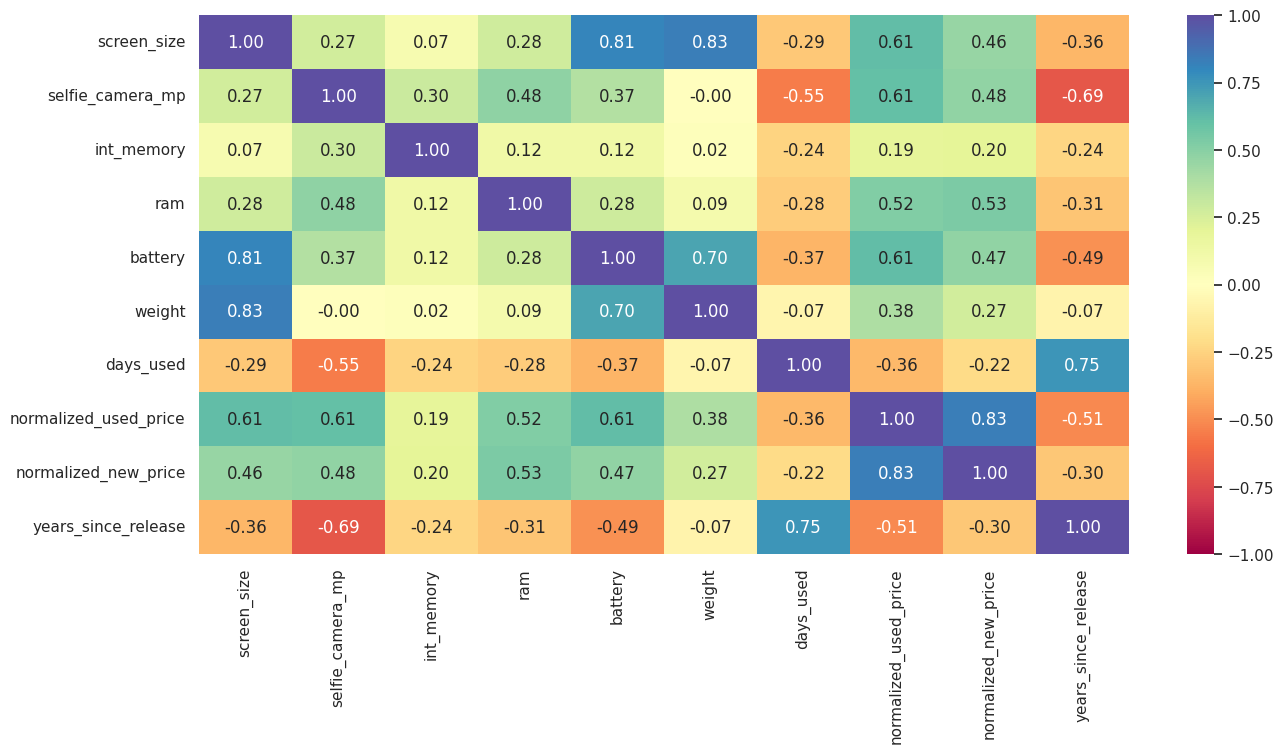

In [20]:
columns_list = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 7))
sns.heatmap(
    df[columns_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The *years since release* has a strong negative correlation with *selfie camera mp* and *normalized used price*
* *Screen size* has a strong positive correlation with *battery* and *weight*

**Normalized Used Price**

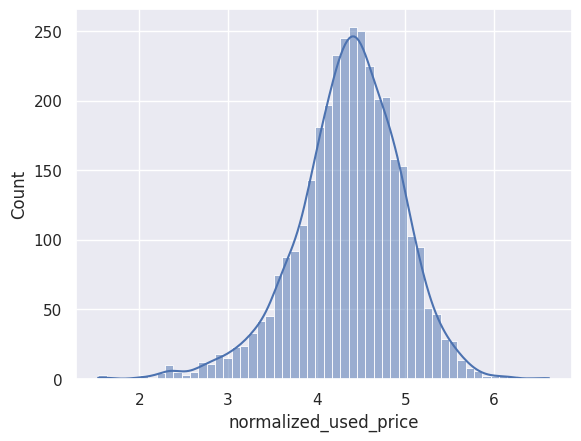

In [22]:
sns.histplot(data=df, x='normalized_used_price', kde=True)
plt.show()

## Model Building - Linear Regression

In [23]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.850
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     159.2
Date:                   Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                           13:55:17   Log-Likelihood:                 163.90
No. Observations:                   2417   AIC:                            -159.8
Df Residuals:                       2333   BIC:                             326.6
Df Model:                             83                                         
Covariance Type:               nonrobust                                         
                                                                                                                                                                                    

**Interpreting the Regression Results:**
* Adjusted R-Squared: the value for adj R-squared is **0.845**
* const coefficient: **1.6815**




## Model Performance Check

In [24]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


def model_performance_regression(model, predictors, target):

    pred = model.predict(predictors)

    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [25]:
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.226107,0.17736,0.849942,0.844202,4.247918


In [26]:
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239404,0.185272,0.841094,0.82616,4.495925


**Observations**
* The training R-squared is 0.85
* The train and test RMSE and MAE are comparable, so the model is not overfitting
*MAE suggest that the model can predict normalized used price within a mean error of 0.185 on the test data
* MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalzed used price on devices

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**TEST FOR MULTICOLLINEARITY**

In [27]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [36]:
vif_data= checking_vif(x_train)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                                              feature         VIF
0                                               const  293.713519
1                                         screen_size    8.072753
2                                    selfie_camera_mp    2.897750
3                                          int_memory    1.434004
4                                                 ram    2.375248
5                                             battery    4.285870
6                                              weight    6.972076
7                                           days_used    2.751173
8                                normalized_new_price    3.464667
9                                 years_since_release    5.260309
10                                 brand_name_Alcatel    3.436328
11                                   brand_name_Apple   13.339101
12                                    brand_name_Asus    3.377646
13                              brand_name_BlackBerry    1.748348
14        

* There are 2 columns with very high VIF values, indicating the presence of multicollinearity
* We will drop numerical columns with VIF > 5
* screen_size has a VIF value of 8.07
* weight has a VIF value of 6.97

**Removing Multicollinearity**

In [33]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    adj_r2 = []
    rmse = []

    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [37]:
col_list = ['screen_size', 'weight']

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.841532,0.232404
1,weight,0.840428,0.233212


In [38]:
col_to_drop = 'screen_size'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF after dropping  screen_size


,feature,VIF
0,const,261.128293
1,selfie_camera_mp,2.892087
2,int_memory,1.433551
3,ram,2.374681
4,battery,4.072823
5,weight,3.274552
6,days_used,2.742322
7,normalized_new_price,3.429825
8,years_since_release,5.067888
9,brand_name_Alcatel,3.436081


* After dropping the screen_size column we no longer have multicollinearity

In [39]:
olsmodel2 = sm.OLS(y_train, x_train2).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     157.5
Date:                   Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                           14:44:41   Log-Likelihood:                 139.73
No. Observations:                   2417   AIC:                            -113.5
Df Residuals:                       2334   BIC:                             367.1
Df Model:                             82                                         
Covariance Type:               nonrobust                                         
                                                                                                                                                                                    

**Dropping High P-Value Variables**

In [40]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Nokia', 'brand_name_Samsung', 'brand_name_Xiaomi', 'os_Others', '4g_yes', 'main_camera_mp_8.0', 'main_camera_mp_5.0', 'main_camera_mp_3.15', 'main_camera_mp_2.0', 'main_camera_mp_16.0', 'main_camera_mp_0.3', 'main_camera_mp_48.0', 'main_camera_mp_1.3', 'main_camera_mp_0.08', 'main_camera_mp_23.0', 'main_camera_mp_4.0', 'main_camera_mp_6.7']


In [41]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]


In [42]:
olsmodel3 = sm.OLS(y_train, x_train3).fit()
print(olsmodel3.summary())


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     585.6
Date:                   Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                           14:52:10   Log-Likelihood:                 111.59
No. Observations:                   2417   AIC:                            -177.2
Df Residuals:                       2394   BIC:                            -44.01
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [43]:
print("Training Performance\n")
olsmodel3_train_perf = model_performance_regression(olsmodel3, x_train3, y_train)
olsmodel3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231053,0.180675,0.843304,0.841798,4.32716


In [44]:
print("Test Performance\n")
olsmodel3_test_perf = model_performance_regression(olsmodel3, x_test3, y_test)
olsmodel3_test_perf


Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241528,0.187329,0.838262,0.834589,4.541924


Observations
* Now no feature has a p-value greater than 0.05, so we will consider the features in x_train3 as the final set of predictor variables and olsmodel3 as the final model to move forward with
* Now the adj R-squared is 0.84, our model is able to explain 84% of the variance
* The adj R- squared in our original ols model was also 84%, this shows that the variables we dropped were not affecting the model
* RMSE and MAE are comparable for train and test sets, indicating that the model is not overfitting

**LINEARITY AND INDEPENDENCE**

In [45]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train
df_pred["Fitted Values"] = olsmodel3.fittedvalues
df_pred["Residuals"] = olsmodel3.resid

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.884247,0.203240
1525,4.448399,4.603789,-0.155390
1128,4.315353,4.308614,0.006738
3003,4.282068,4.190362,0.091706
2907,4.456438,4.505087,-0.048649


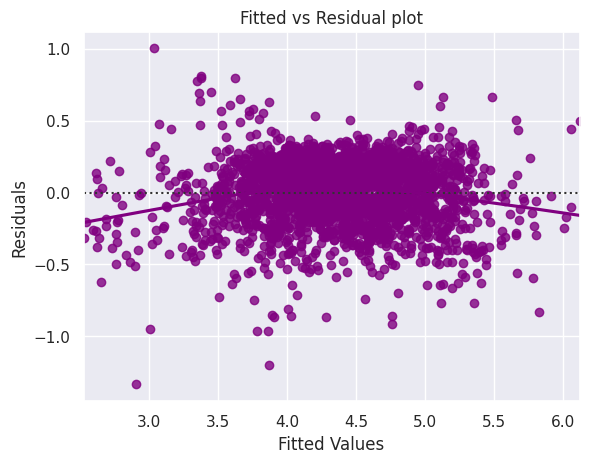

In [46]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Observations
* We see no pattern in the plot above.
* The assumptions of linearity and independence are satisfied

**TEST FOR NORMALITY**

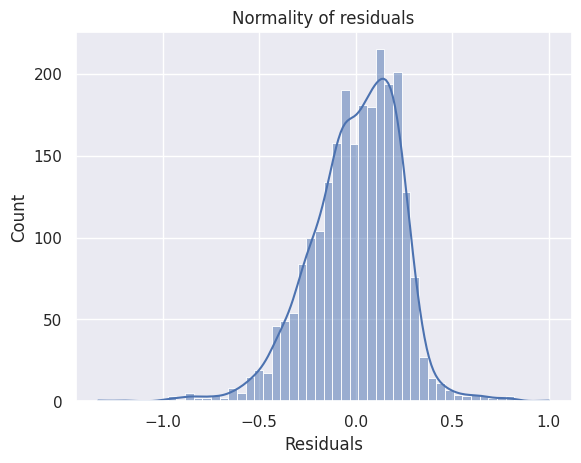

In [48]:
sns.histplot(data=df_pred, x='Residuals', kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals has a bell shape
* Let's check the Q-Q plot

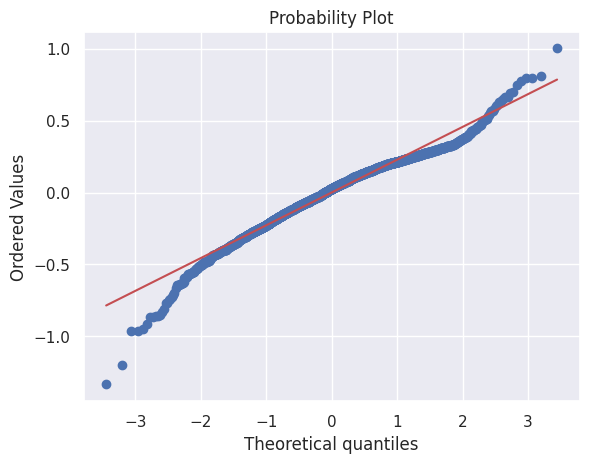

In [49]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab)
plt.show()

* The residuals mostly follow a straight line except for the tails
* Let's check using the Shapiro-Wilk test

In [50]:
stats.shapiro(df_pred['Residuals'])

ShapiroResult(statistic=0.9726276993751526, pvalue=4.226222461485406e-21)

* Since the p-value < 0.05, the residuals are not normal
* We will accept the distribution as close to being normal so the assumption is satisfied

**TEST FOR HOMOSCEDASTICITY**

In [51]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0604729462425797), ('p-value', 0.15606511727489084)]

* **Since the p-value > 0.05**, we can say that the residuals are homoscedastic
*This assumption is satisfied

**PREDICTIONS ON TEST DATA**

In [52]:
# predictions on the test set
pred = olsmodel3.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.429667
2341,3.696103,4.020496
1913,3.592093,3.660942
688,4.306495,4.107807
650,4.522115,5.179033
2291,4.259294,4.404081
40,4.997685,5.439022
1884,3.875359,4.062300
2538,4.206631,4.026504
45,5.380450,5.254659


* We can observe that our model has returned good prediction results. The actual and predicted values are comparible.

## Final Model

In [53]:
x_train_final= x_train3.copy()
x_test_final = x_test3.copy()

In [54]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     585.6
Date:                   Tue, 01 Aug 2023   Prob (F-statistic):               0.00
Time:                           15:20:07   Log-Likelihood:                 111.59
No. Observations:                   2417   AIC:                            -177.2
Df Residuals:                       2394   BIC:                            -44.01
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [55]:
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231053,0.180675,0.843304,0.841798,4.32716


In [56]:
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241528,0.187329,0.838262,0.834589,4.541924


* The model is able to explain about 84% of the variation of data
* The train and test RMSE and MAE are low and comparible
* The MAPE on the test set shows that we can predict within 4.5% of the normalized used price of devices
* This model is good for prediction and inference purposes

## Actionable Insights and Recommendations

**Insights**
1. The model is able to explain 84% of the variation of data and within 4.5% of the normalized used price on devices, which is very good. This indicates that the model is good for predictions and inference purposes.
2. If the selfie camera increases by one unit, the normalized used price of the device increases by 0.0148 units, all other variables held constant.
3. If the RAM increases by one unit, the normalized used price of the device increases by 0.017 units, all other variables held constant.
4. If the weight of the device increases by one unit, the normalized used price of the device increases by 0.0017 units, all other variables held constant.
5. If the normalized new price of the device increases by one unit, the normalized used price of the device increases by 0.4141 units, all other variables held constant.
6. If the years since release increases by one unit, the normalized used price of the device decreases by 0.0242 units, all other variables held constant.
7. If the device is a Nokia, the normalized used price of the device increases by 0.0710 units, all other variables held constant.
8. If the brand name of the device is Samsung, the normalized used price of the device decreases by 0.0350 units, all other variables held constant.
9. If the brand name of the device is Xiaomi, the normalized used price of the device increases by 0.0696 units, all other variables held constant.
10. If the device is 4g, the normalized used price of the device increases by 0.0394 units, all other variables held constant.

**Recommendations**
1. ReCell should consider refurbishing and selling more Nokia and Xiaomi devices and less Samsung.
2. ReCell should consider refurbishing more 4g devices.


___